## Lab_08
## P. SYAM PRASAD BL.EN.U4AIE21103

## A1.Use LSTM, Bi-LSTM networks for speechrecognition.Use STFT OR STCT, MFCC & LPC coefficients.



In [1]:
import numpy as np
import librosa
import librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed, Dropout

audio_file = r'/content/SPeech processing 2 audio.wav'
y, sr = librosa.load(audio_file, sr=None)

D = np.abs(librosa.stft(y)) # Short-Time Fourier Transform

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13) #MFCC Implementation

X = mfccs.T  # Transpose the MFCC matrix to match the shape expected by the LSTM model
X = X.reshape(X.shape[0], X.shape[1], 1)

# LSTM Model
num_classes = 10
model = Sequential([
    Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(X.shape[1], 1)),
    TimeDistributed(Dense(units=64, activation='relu')),
    Dropout(0.2),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    TimeDistributed(Dense(units=num_classes, activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 13, 256)           133120    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 13, 64)            16448     
 ributed)                                                        
                                                                 
 dropout (Dropout)           (None, 13, 64)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 13, 128)           66048     
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 13, 10)            1290      
 stributed)                                             

## A2. Speak the sentence “Bhanumathi weds Rajat”(भानुमतिवेड्सरजि||భానుమతివెడ్స్రజత్). Construct speech for theword“Bharat”(భారత్|| भारत|| ಭರತ್|| பாரத்)by combining segmented phonemestaken from “Bhanumathi weds Rajat”speech recording. Listen to this word speech generated and note down the issues associated with this approach of speech synthesis.The string written Indian scripts may have some error. Please validate before using.

In [ ]:
audio_file = r'/content/Bharat.wav'

In [ ]:
import os
import tempfile
import speech_recognition as sr
import pyttsx3

custom_temp_dir = r"C:\Users\pothi\OneDrive\Documents\Lab8"    # Temporary directory for permissions


# Transcribe the audio file
audio_file = r'/content/Bharat.wav'
recognizer = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)
transcription = recognizer.recognize_google(audio_data)

# function to segment phonemes
def segment_phonemes(transcription, target_word):
    words = transcription.split()
    for word in words:
        if word.lower() == target_word.lower():
            return word

# Segment phonemes for the word "Bharat"
phonemes = segment_phonemes(transcription, "Bharat")

# Synthesize speech for the word "Bharat"
engine = pyttsx3.init()
output_file = os.path.join(custom_temp_dir, "Bharat.wav")
engine.save_to_file(phonemes, output_file)
engine.runAndWait()

In [2]:
import IPython.display as ipd
ipd.display(ipd.Audio("Bharat.wav"))

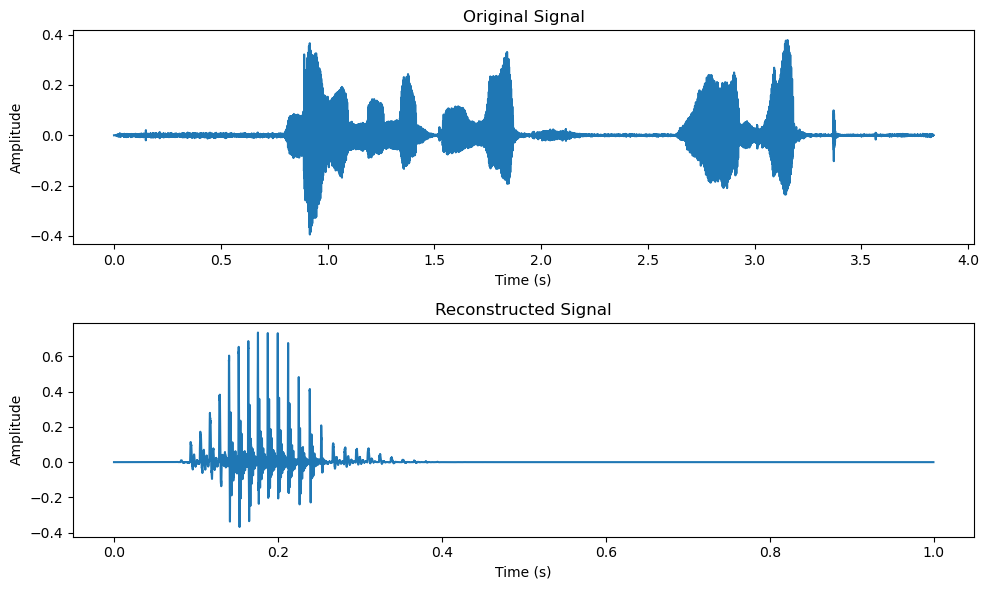

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(2, 1, 1)
plt.title('Original Signal')
audio_data_np, _ = librosa.load(audio_file, sr=source.SAMPLE_RATE)
plt.plot(np.linspace(0, len(audio_data_np) / source.SAMPLE_RATE, num=len(audio_data_np)), audio_data_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Reconstructed signal
reconstructed_audio_data, _ = librosa.load(output_file, sr=source.SAMPLE_RATE)
plt.subplot(2, 1, 2)
plt.title('Reconstructed Signal')
plt.plot(np.linspace(0, len(reconstructed_audio_data) / source.SAMPLE_RATE, num=len(reconstructed_audio_data)), reconstructed_audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()